# 🤖 10_Overfitting_Check — Перевірка на переобучення
# Project: Прогнозування Відтоку Клієнтів
# Team Lead: Vitalii Subbotin
# Date: 2025-10-16

In [1]:
# 1. Імпорт бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

In [2]:
# 2. Шляхи
BASE_DIR = Path("..")
MODELS_DIR = BASE_DIR / "models"

In [3]:
# 3. Завантаження попередніх результатів
train_eval_path = MODELS_DIR / "final_evaluation_results.csv"
holdout_eval_path = MODELS_DIR / "final_holdout_results.csv"

train_df = pd.read_csv(train_eval_path)
holdout_df = pd.read_csv(holdout_eval_path)

print("✅ Дані завантажено:")
display(train_df)
display(holdout_df)

✅ Дані завантажено:


,model,accuracy,precision,recall,f1,roc_auc
0,LightGBM_final,0.958829,0.969494,0.95618,0.962791,0.994339


,model,accuracy,precision,recall,f1,roc_auc
0,LightGBM_final_holdout,0.946728,0.960463,0.943196,0.951751,0.983566


In [4]:
# 4. Додаємо позначки
train_df["dataset"] = "Train/Test (validation)"
holdout_df["dataset"] = "Hold-out (final)"

In [5]:
# 5. # Об’єднуємо
combined = pd.concat([train_df, holdout_df], ignore_index=True)

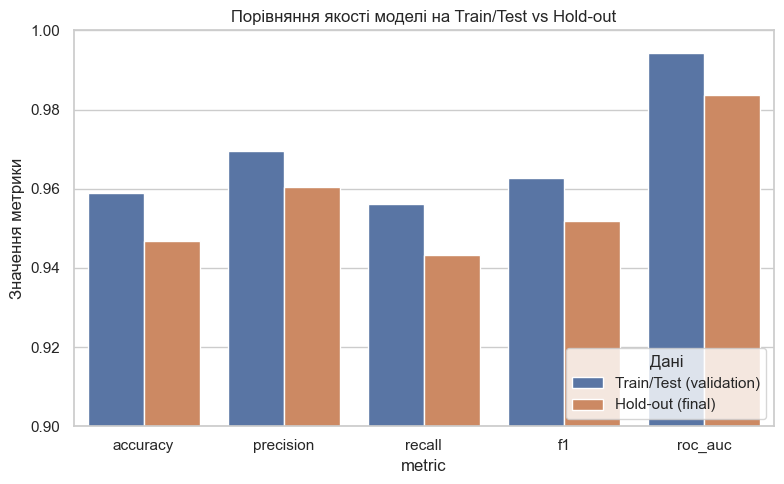

In [7]:
# 6. Візуальне порівняння метрик
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
combined_melted = combined.melt(id_vars="dataset", value_vars=metrics, var_name="metric", value_name="value")

plt.figure(figsize=(8,5))
sns.barplot(data=combined_melted, x="metric", y="value", hue="dataset")
plt.title("Порівняння якості моделі на Train/Test vs Hold-out")
plt.ylabel("Значення метрики")
plt.ylim(0.9, 1.0)
plt.legend(title="Дані", loc="lower right")
plt.tight_layout()
plt.show()

In [8]:
# 7. Аналітична оцінка
diff = (train_df[metrics].values - holdout_df[metrics].values)[0]
diff_df = pd.DataFrame({
    "Метрика": metrics,
    "Різниця (Train - Holdout)": diff
})
print("\n📋 Порівняння різниць у метриках:")
display(diff_df)


📋 Порівняння різниць у метриках:


,Метрика,Різниця (Train - Holdout)
0,accuracy,0.012101
1,precision,0.009031
2,recall,0.012984
3,f1,0.011040
4,roc_auc,0.010773


In [9]:
# 8. Висновок
avg_diff = abs(diff).mean()
if avg_diff < 0.01:
    conclusion = "✅ Модель збалансована — переобучення відсутнє або мінімальне."
elif avg_diff < 0.03:
    conclusion = "⚠️ Легка ознака переобучення — варто перевірити параметри моделі."
else:
    conclusion = "🚨 Модель має суттєве переобучення — потрібно оптимізувати регуляризацію або зменшити складність."

print("\n📌 Висновок:")
print(conclusion)


📌 Висновок:
⚠️ Легка ознака переобучення — варто перевірити параметри моделі.
